In [2]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


## Problem Statement: 

**About Company:**

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

**Problem**

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

**Dataset Description:**

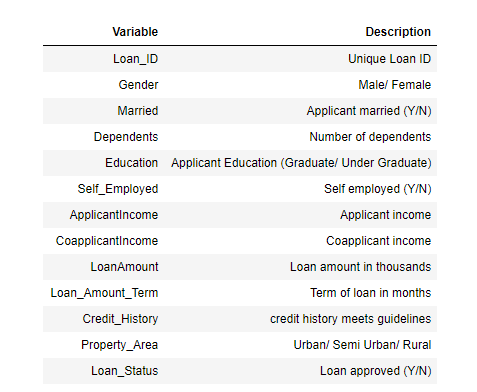

## Train Data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Loan Prediction/Loan Prediction Dataset/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.drop('Loan_ID',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [6]:
df.describe(include=['int64','float64'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [8]:
missing_column=[feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in missing_column:
    print(feature, np.round((df[feature].isnull().sum())/len(df)*100),'% Missing Value')

Gender 2.0 % Missing Value
Married 0.0 % Missing Value
Dependents 2.0 % Missing Value
Self_Employed 5.0 % Missing Value
LoanAmount 4.0 % Missing Value
Loan_Amount_Term 2.0 % Missing Value
Credit_History 8.0 % Missing Value


In [9]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
obj_cols= [*df.select_dtypes('object').columns]

# as Loan_Status is a target variable
obj_cols.remove('Loan_Status')

obj_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

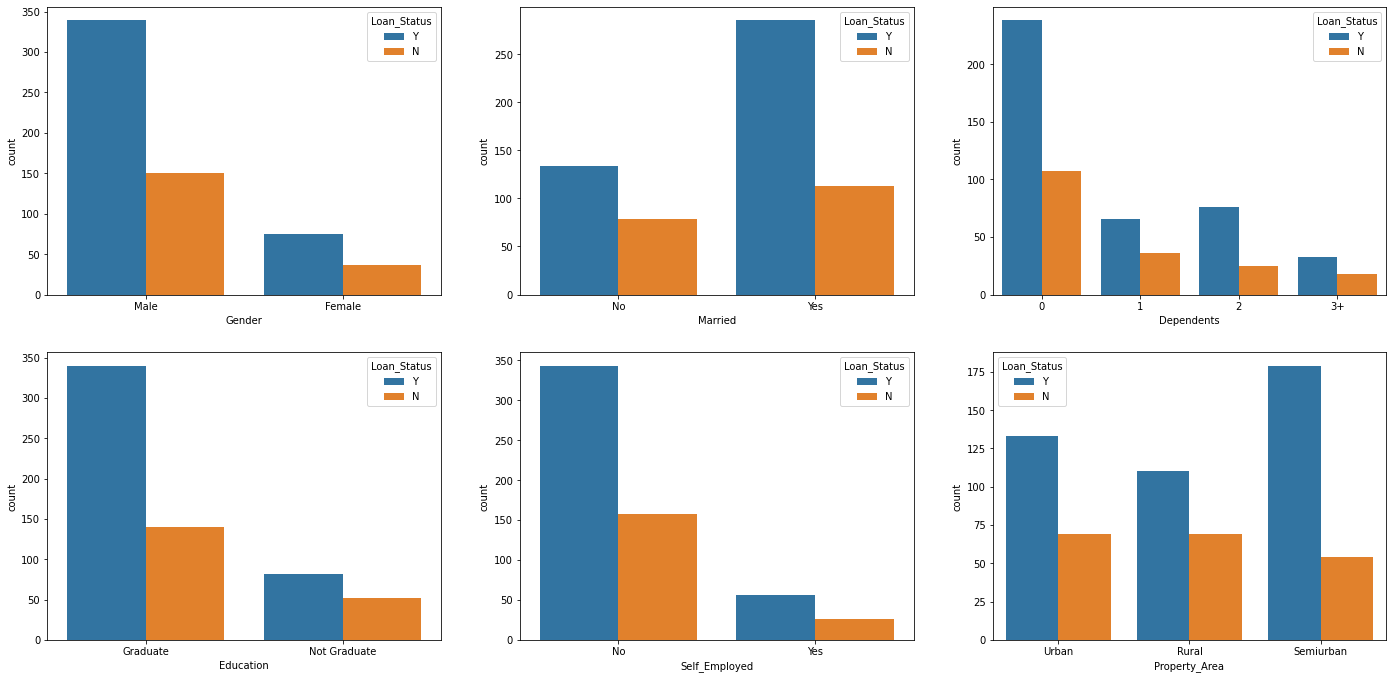

In [11]:
plt.figure(figsize=(24,18))

for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.countplot(cols, data=df, hue='Loan_Status')

**Plots above convey following things about the dataset:**

1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men than Women (approx. 3x)
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

In [12]:
num_cols= [*df.select_dtypes(['Int64', 'Float64']).columns]
num_cols.remove('Loan_Amount_Term')
num_cols.remove('Credit_History')
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

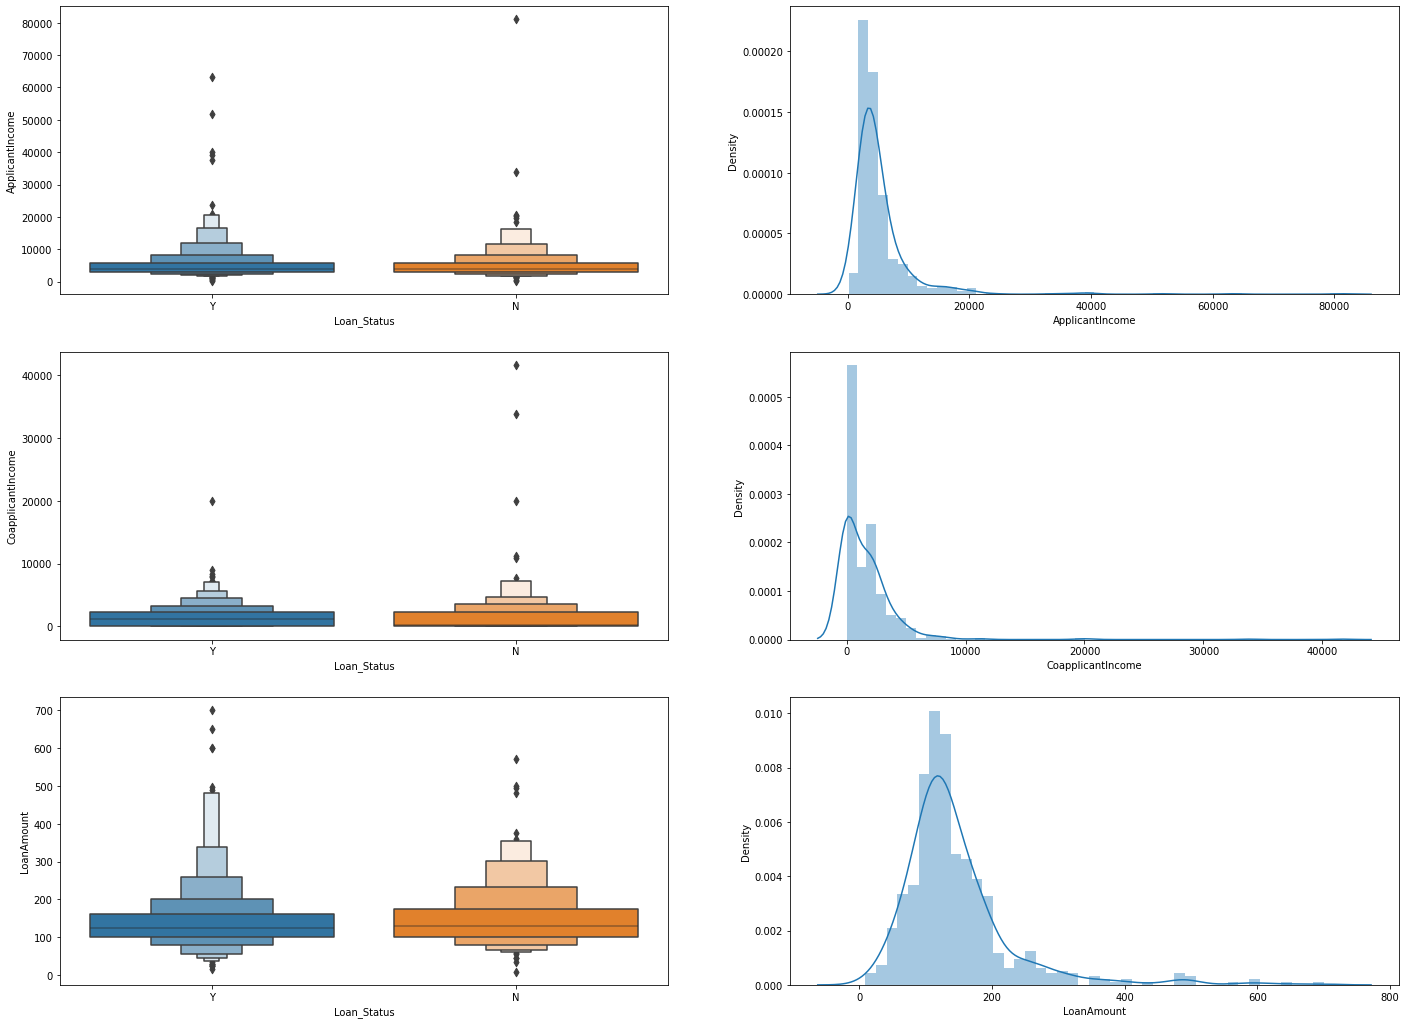

In [13]:
plt.figure(figsize=(24, 18))
count = 1

for cols in num_cols:
    
    plt.subplot(3, 2, count)
    sns.boxenplot(x='Loan_Status', y= cols, data= df)   
    count +=1
    
    plt.subplot(3, 2, count)    
    sns.distplot(df.loc[df[cols].notna(), cols])    
    count+=1

**For Numercical Columns, there is no significant relation to Loan approval status**

Dealing With The Loan_Status Column

In [14]:
df.Loan_Status.replace({'Y':1, 'N':0},inplace=True)
df['Loan_Status'].astype(int)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [15]:
dummies=pd.get_dummies(df,drop_first=True)
dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [16]:
from sklearn.impute import SimpleImputer
SimImp = SimpleImputer()
train= pd.DataFrame(SimImp.fit_transform(dummies), columns=dummies.columns)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
train.isnull().any()

ApplicantIncome            False
CoapplicantIncome          False
LoanAmount                 False
Loan_Amount_Term           False
Credit_History             False
Loan_Status                False
Gender_Male                False
Married_Yes                False
Dependents_1               False
Dependents_2               False
Dependents_3+              False
Education_Not Graduate     False
Self_Employed_Yes          False
Property_Area_Semiurban    False
Property_Area_Urban        False
dtype: bool

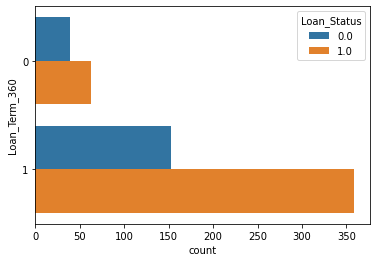

In [18]:
# we'll create a binary column here for loan amount term and check the data with a count plot
train['Loan_Term_360']=np.where(train.Loan_Amount_Term == 360,1,0)

# looks like there is some importance and can be used in the model
sns.countplot(y='Loan_Term_360', data=train, hue='Loan_Status')

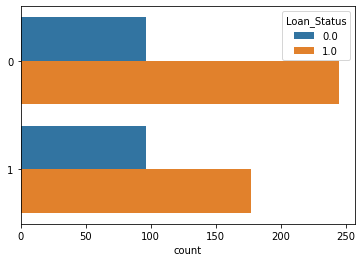

In [19]:
#we see that regardless of CoapplicantIncome loans have been rejected in equal amounts and this variable might not help
NoCoapplicantIncome= np.where(train['CoapplicantIncome']== 0, 1, 0)

# looks like there is some importance and can be used in the model
sns.countplot(y=NoCoapplicantIncome, hue=train.Loan_Status)

In [20]:
train.drop('Loan_Amount_Term', inplace= True, axis= 1)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Term_360
0,5849.0,0.0,146.412162,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,4583.0,1508.0,128.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3000.0,0.0,66.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,2583.0,2358.0,120.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,6000.0,0.0,141.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [21]:
train.shape

(614, 15)

In [22]:
X=train.drop('Loan_Status',axis=1)
y=train[['Loan_Status']]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
DTC_pred=DTC.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,DTC_pred))
print(confusion_matrix(y_test,DTC_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60        38
         1.0       0.83      0.79      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.71      0.70       123
weighted avg       0.75      0.74      0.74       123

[[24 14]
 [18 67]]


In [26]:
from sklearn.model_selection import cross_val_score
print("Validation Mean Accuracy: ",cross_val_score(DTC,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean Accuracy:  0.6944547515976088


We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

**First let's try tuning 'Max_Depth' of tree**

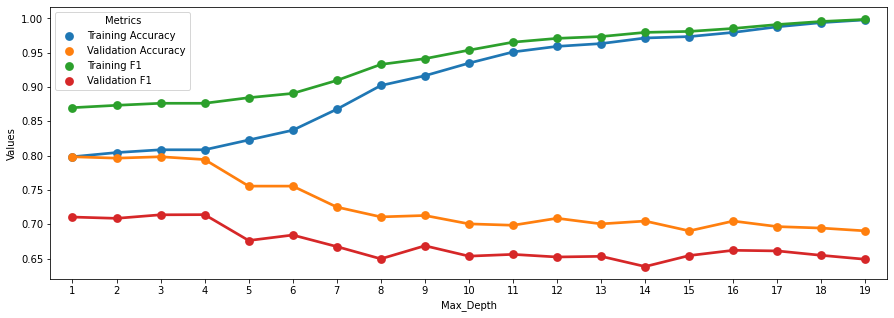

In [27]:
from sklearn.metrics import accuracy_score,f1_score
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    DTC = DecisionTreeClassifier(max_depth=depth)
    DTC.fit(X_train,y_train)
    pred = DTC.predict(X_train)

    training_acc = accuracy_score(y_train,pred)
    train_f1 = f1_score(y_train,pred)
    val_mean_f1 = cross_val_score(DTC, X_train,y_train, cv=5, scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(DTC, X_train,y_train, cv=5, scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, 
                    "Validation F1":val_f1, "Max_Depth": tree_depths }

Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")

fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)


From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7

**Visulazing Decision Tree with Max Depth = 3**

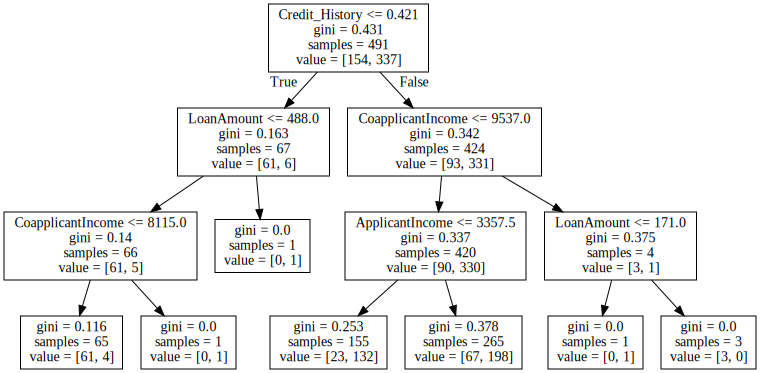

In [28]:
import graphviz 
from sklearn import tree

DTC = tree.DecisionTreeClassifier(max_depth = 3)
DTC.fit(X_train,y_train)
dot_data = tree.export_graphviz(DTC,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit. We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

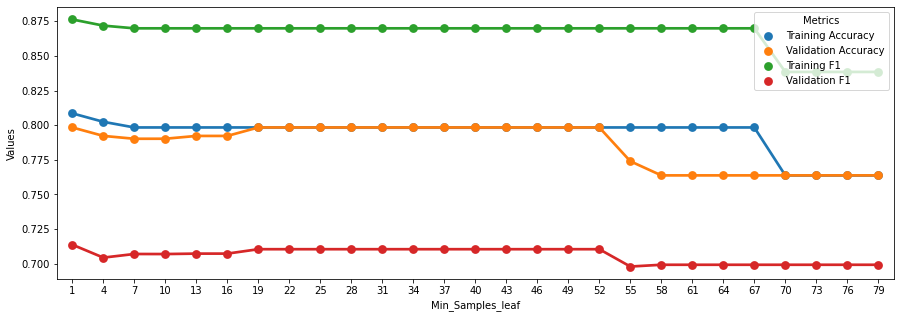

In [29]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    DTC = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    DTC.fit(X_train,y_train)
    pred = DTC.predict(X_train)

    training_acc = accuracy_score(y_train,pred)
    train_f1 = f1_score(y_train,pred)
    val_mean_f1 = cross_val_score(DTC,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(DTC,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, 
                           "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }

Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")

fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

In [30]:
DTC = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
DTC.fit(X_train,y_train)
pred = DTC.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,pred))
print("Test F1 Score: ",f1_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
[[21 17]
 [ 1 84]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

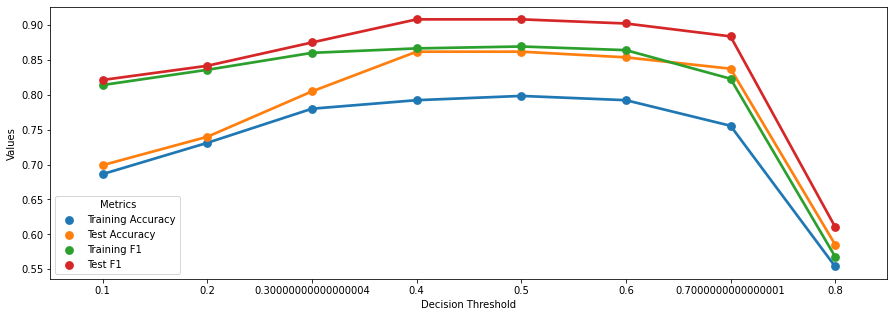

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    LR = LogisticRegression(solver='liblinear')
    LR.fit(X_train,y_train)
    
    LR_train_thresh = LR.predict_proba(X_train)[:,1]
    LR_pred_train = (LR_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,LR_pred_train)
    train_f1 = f1_score(y_train,LR_pred_train)
    
    LR_test_thresh = LR.predict_proba(X_test)[:,1]
    LR_pred_test = (LR_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,LR_pred_test)
    test_f1 = f1_score(y_test,LR_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores,
                    "Test F1":test_f1_scores, "Decision Threshold": thresholds }

Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")

fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [32]:
thresh = 0.4 ### Threshold chosen from above Curves
LR_test_thresh = LR.predict_proba(X_test)[:,1]
LR_pred_test = (LR_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,LR_pred_test))
print("Test F1 Score: ",f1_score(y_test,LR_pred_test))
print(confusion_matrix(y_test,LR_pred_test))

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
[[22 16]
 [ 1 84]]


**Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier. In this analysis, we did extensive analysis of input data and were able to achieve Test Accuracy of 86 %.**

## Test Data

In [33]:
df2=pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Loan Prediction/Loan Prediction Dataset/test.csv')
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [34]:
df2.drop('Loan_ID',axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [35]:
missing_column=[feature for feature in df2.columns if df2[feature].isnull().sum()>1]

for feature in missing_column:
    print(feature, np.round((df2[feature].isnull().sum())/len(df2)*100),'% Missing Value')

Gender 3.0 % Missing Value
Dependents 3.0 % Missing Value
Self_Employed 6.0 % Missing Value
LoanAmount 1.0 % Missing Value
Loan_Amount_Term 2.0 % Missing Value
Credit_History 8.0 % Missing Value


In [36]:
dummies=pd.get_dummies(df2,drop_first=True)
dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,NaN,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [37]:
from sklearn.impute import SimpleImputer
SimImp = SimpleImputer()
test= pd.DataFrame(SimImp.fit_transform(dummies), columns=dummies.columns)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3076.0,1500.0,126.0,360.0,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5000.0,1800.0,208.0,360.0,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2340.0,2546.0,100.0,360.0,0.825444,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3276.0,0.0,78.0,360.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [38]:
test.isnull().any()

ApplicantIncome            False
CoapplicantIncome          False
LoanAmount                 False
Loan_Amount_Term           False
Credit_History             False
Gender_Male                False
Married_Yes                False
Dependents_1               False
Dependents_2               False
Dependents_3+              False
Education_Not Graduate     False
Self_Employed_Yes          False
Property_Area_Semiurban    False
Property_Area_Urban        False
dtype: bool

In [39]:
# we'll create a binary column here for loan amount term and check the data with a count plot
test['Loan_Term_360']=np.where(test.Loan_Amount_Term == 360,1,0)

In [40]:
test.drop('Loan_Amount_Term', inplace= True, axis= 1)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Term_360
0,5720.0,0.0,110.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,3076.0,1500.0,126.0,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,5000.0,1800.0,208.0,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,2340.0,2546.0,100.0,0.825444,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,3276.0,0.0,78.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [41]:
test.shape

(367, 14)

In [42]:
Loan_Status=LR.predict(test)
Loan_Status

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [43]:
test['Loan_Status']=Loan_Status
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Term_360,Loan_Status
0,5720.0,0.0,110.0,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0
1,3076.0,1500.0,126.0,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0
2,5000.0,1800.0,208.0,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1.0
3,2340.0,2546.0,100.0,0.825444,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1.0
4,3276.0,0.0,78.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0


In [44]:
submissive=pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Loan Prediction/Loan Prediction Dataset/sample_submission.csv')
submissive.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [45]:
submission = pd.DataFrame()
submission['Loan_ID'] =submissive['Loan_ID']
submission['Loan_Status'] = test['Loan_Status']

# submission.to_csv('sub.csv', index=False)